## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Descubrimiento de grupos en los datos

---

En esta libreta se generan los modelos de clusterización sobre el dataset final del escenario para su posterior evaluación y análisis. Se utilizará como herramienta de soporte a mlflow para el registro completo de la experimentación. 

---

In [6]:
# Importación de librerías

import pandas as pd
# Se importa mlflow para registro de la experimentación 
import mlflow
# Se importan los métodos a utilizar para clusterizar
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, MeanShift
# Se importan las métricas a utilizar para evaluar el proceso
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


----

##### Lectura del dataset

In [7]:
df = pd.read_csv("../../../data/final/datos_clusterizacion.csv", sep=";")
df.head(5)

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,24,11000,3,5.0,64800,0.17,5.79,0,36.0,15149.0,...,True,False,True,False,False,False,False,True,False,False
1,24,1500,2,0.0,30996,0.05,15.99,1,45.0,992.0,...,False,True,False,True,True,False,False,False,False,False
2,23,10000,2,7.0,40104,0.25,12.72,0,38.0,1447.0,...,False,True,False,True,False,True,False,False,False,False
3,25,6000,4,2.0,23198,0.26,8.00,0,24.0,3940.0,...,True,False,True,False,False,False,False,False,False,True
4,26,10000,2,0.0,50000,0.20,7.74,0,41.0,4369.0,...,True,False,True,False,False,False,False,False,False,True


----

##### Configuración de la experimentación

In [9]:
# Se genera el experimento en mlflow
exp_name = 'Experimentación clustering'
exp_id = mlflow.create_experiment(name=exp_name)

In [10]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="Kmeans - K=2"):
    # Selección y configuración de la técnica
    modelo_clusters = KMeans(n_clusters=2)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 2)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "Kmeans_K2")

    # Se finaliza el registro
    mlflow.end_run()

Para contabilizar los elementos por cluster se utilizan las labels generadas

In [11]:
# Se preserva el conjunto de datos original para evitar problemas
df_kmeans_k2 = df.copy()
# Se agregan las labels generadas
df_kmeans_k2['cluster'] = cluster_labels
df_kmeans_k2['cluster'].value_counts()

cluster
0    8276
1     602
Name: count, dtype: int64

Se pasa a probar otro método (clustering jerárquico)

In [12]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="AGClustering - K=3"):
    # Selección y configuración de la técnica
    modelo_clusters = AgglomerativeClustering(n_clusters=3)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 3)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "AGC_K3")

    # Se finaliza el registro
    mlflow.end_run()

2024/05/06 22:53:20 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Para contabilizar los elementos por cluster se utilizan las labels generadas

In [13]:
# Se preserva el conjunto de datos original para evitar problemas
df_agc_k3 = df.copy()
# Se agregan las labels generadas
df_agc_k3['cluster'] = cluster_labels
df_agc_k3['cluster'].value_counts()

cluster
0    4558
2    3950
1     370
Name: count, dtype: int64

Finalmente, se prueba un método que no tiene parámetros

In [20]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="MeanShift"):
    # Selección y configuración de la técnica
    modelo_clusters = MeanShift()
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # No hay parámetros por registrar

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "MS")

    # Se finaliza el registro
    mlflow.end_run()

Para contabilizar los elementos por cluster se utilizan las labels generadas

In [21]:
# Se preserva el conjunto de datos original para evitar problemas
df_ms = df.copy()
# Se agregan las labels generadas
df_ms['cluster'] = cluster_labels
df_ms['cluster'].value_counts()

cluster
0    8512
1     290
2      49
3      11
4       8
5       7
6       1
Name: count, dtype: int64

----

Prueba Nro. 2

- Kmeans


In [16]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="Kmeans - K=3"):
    # Selección y configuración de la técnica
    modelo_clusters = KMeans(n_clusters=3)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 3)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "Kmeans_K3")

    # Se finaliza el registro
    mlflow.end_run()

In [17]:
# Se preserva el conjunto de datos original para evitar problemas
df_kmeans_k3 = df.copy()
# Se agregan las labels generadas
df_kmeans_k3['cluster'] = cluster_labels
df_kmeans_k3['cluster'].value_counts()

cluster
2    4695
1    3878
0     305
Name: count, dtype: int64

In [61]:
df_kmeans_k2.to_csv("../../../data/final/resultados_kmeans_k2.csv", sep=";", index=False)

- Clustering Jerárquico

In [18]:
# Por cada método se debe registrar la ejecución
with mlflow.start_run(experiment_id=exp_id, run_name="AGClustering - K=2"):
    # Selección y configuración de la técnica
    modelo_clusters = AgglomerativeClustering(n_clusters=2)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 2)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "AGC_K2")

    # Se finaliza el registro
    mlflow.end_run()

2024/05/06 23:20:59 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [19]:
# Se preserva el conjunto de datos original para evitar problemas
df_agc_k2 = df.copy()
# Se agregan las labels generadas
df_agc_k2['cluster'] = cluster_labels
df_agc_k2['cluster'].value_counts()

cluster
0    8508
1     370
Name: count, dtype: int64

----

Prueba #3

Búsqueda de cantidad de clusters para Kmeans

- Kmeans

In [37]:
import kneed
# Calculo del número de clusters con el método del codo para SJ
distortions = []
silhouettes = []
for i in range(2, 20):
    km = KMeans(i, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=42)
    clustering = km.fit_predict(df)
    distortions.append(km.inertia_)
    silhouettes.append(silhouette_score(df, clustering))



Elbow:  6


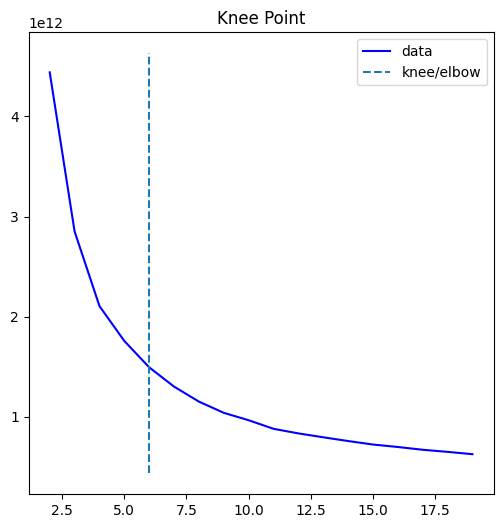

In [38]:
from kneed import KneeLocator
kneedle = kneed.KneeLocator(range(2, 20), distortions[:20], curve="convex", direction="decreasing")
elbow_point = kneedle.elbow
print('Elbow: ', elbow_point)
kneedle.plot_knee()

In [42]:
#Con el método del codo sale que es mejor 6 clusters
with mlflow.start_run(experiment_id=exp_id, run_name="Kmeans - K=6"):
    # Selección y configuración de la técnica
    modelo_clusters = KMeans(n_clusters=6)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 6)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "Kmeans_K6")

    # Se finaliza el registro
    mlflow.end_run()

In [43]:
# Se preserva el conjunto de datos original para evitar problemas
df_kmeans_k6 = df.copy()
# Se agregan las labels generadas
df_kmeans_k6['cluster'] = cluster_labels
df_kmeans_k6['cluster'].value_counts()

cluster
0    3239
3    3004
2    1842
4     581
1     169
5      43
Name: count, dtype: int64

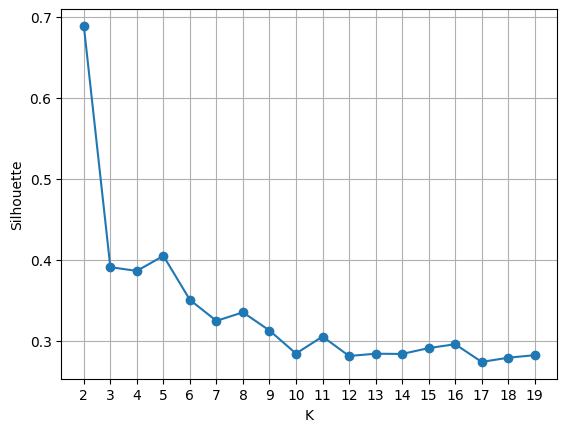

In [41]:
import matplotlib.pyplot as plt
# Calculo del número de clusters con la silueta 
plt.plot(range(2,20), silhouettes, marker='o')
plt.xticks(range(2, 20))
plt.xlabel('K')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

In [44]:
# Según el método de la silueta da mejor con 17 clusters
with mlflow.start_run(experiment_id=exp_id, run_name="Kmeans - K=17"):
    # Selección y configuración de la técnica
    modelo_clusters = KMeans(n_clusters=17)
    
    trained_model = modelo_clusters.fit(df)
    cluster_labels = trained_model.labels_

    # Se realizar el cálculo de las métricas seleccionadas
    score_s = silhouette_score(df, cluster_labels)
    score_db = davies_bouldin_score(df, cluster_labels)
    score_ch = calinski_harabasz_score(df, cluster_labels)

    # Se registra el parámetro K
    mlflow.log_param('Valor K', 17)

    # Se registran las métricas de evaluación
    mlflow.log_metric('silhouette_score', score_s)
    mlflow.log_metric('davies_bouldin_score', score_db)
    mlflow.log_metric('calinski_harabasz_score', score_ch)

    # Se guarda el modelo generado
    mlflow.sklearn.log_model(trained_model, "Kmeans_K17")

    # Se finaliza el registro
    mlflow.end_run()

In [45]:
# Se preserva el conjunto de datos original para evitar problemas
df_kmeans_k17 = df.copy()
# Se agregan las labels generadas
df_kmeans_k17['cluster'] = cluster_labels
df_kmeans_k17['cluster'].value_counts()

cluster
9     1489
3     1408
10    1362
6      825
15     543
0      520
8      435
2      422
12     379
7      354
16     289
4      284
13     229
11     173
1      105
5       49
14      12
Name: count, dtype: int64